In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import clear_output
from time import sleep
import os
from tensorflow.keras.layers import Conv2D, Dropout, Dense, Flatten
from tensorflow.keras.models import Sequential

In [3]:
Train_Dir = r'F:\kaggle\Facial Keypoints Detection\input\training.csv'
Test_Dir = r'F:\kaggle\Facial Keypoints Detection\input\test.csv'
lookid_dir = r'F:\kaggle\Facial Keypoints Detection\input\IdLookupTable.csv'

In [4]:
train_data = pd.read_csv(Train_Dir)  
test_data = pd.read_csv(Test_Dir)
lookid_data = pd.read_csv(lookid_dir)


In [5]:
os.listdir(r'F:\kaggle\Facial Keypoints Detection\input')

['IdLookupTable.csv', 'test.csv', 'training.csv']

In [6]:
train_data.head().T

,0,1,2,3,4
left_eye_center_x,66.033564,64.332936,65.057053,65.225739,66.725301
left_eye_center_y,39.002274,34.970077,34.909642,37.261774,39.621261
right_eye_center_x,30.227008,29.949277,30.903789,32.023096,32.24481
right_eye_center_y,36.421678,33.448715,34.909642,37.261774,38.042032
left_eye_inner_corner_x,59.582075,58.85617,59.412,60.003339,58.56589
left_eye_inner_corner_y,39.647423,35.274349,36.320968,39.127179,39.621261
left_eye_outer_corner_x,73.130346,70.722723,70.984421,72.314713,72.515926
left_eye_outer_corner_y,39.969997,36.187166,36.320968,38.380967,39.884466
right_eye_inner_corner_x,36.356571,36.034723,37.678105,37.618643,36.98238
right_eye_inner_corner_y,37.389402,34.361532,36.320968,38.754115,39.094852


In [7]:
train_data.isnull().any().value_counts()

True     28
False     3
Name: count, dtype: int64

In [25]:
#train_data.isnull().sum()

In [8]:
train_data.fillna(method='ffill', inplace=True)

C:\Users\daivi\AppData\Local\Temp\ipykernel_25028\2009382148.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_data.fillna(method='ffill', inplace=True)


In [9]:
train_data.isnull().any().value_counts()


False    31
Name: count, dtype: int64

In [10]:
train_data.shape[0]

7049

In [11]:
train_data.columns

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [45]:
#train_data['Image'][101].split(' ')

In [12]:
image = []
for i in range(0,train_data.shape[0]):
    img = train_data['Image'][i].split(' ')
    img = [0 if x == '' else x for x in img]
    image.append(img)

In [13]:
img_list = np.array(image, dtype='float')

In [15]:
X_train = img_list.reshape(-1,96,96,1)

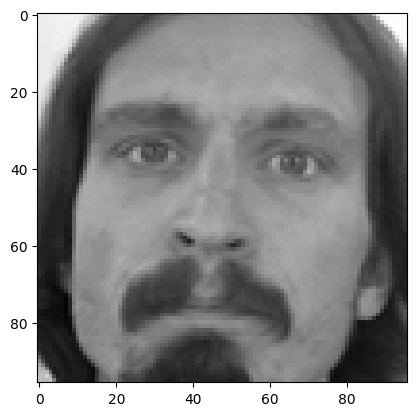

In [22]:
plt.imshow(X_train[0].reshape(96,96), cmap='gray')
plt.show()

In [23]:
training = train_data.drop('Image', axis=1)

y_train = []
for i in range(0,7049):
    y = training.iloc[i,:]

    y_train.append(y)

y_train = np.array(y_train, dtype='float')
